In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel('Contraceptive_method_dataset.xlsx')

In [3]:
df_copy = pd.read_excel('Contraceptive_method_dataset.xlsx')

In [4]:
df_cart = pd.read_excel('Contraceptive_method_dataset.xlsx')

### Basics

In [3]:
df.head()

,Wife_age,Wife_ education,Husband_education,No_of_children_born,Wife_religion,Wife_Working,Husband_Occupation,Standard_of_living_index,Media_exposure,Contraceptive_method_used
0,24.0,Primary,Secondary,3.0,Scientology,No,2,High,Exposed,No
1,45.0,Uneducated,Secondary,10.0,Scientology,No,3,Very High,Exposed,No
2,43.0,Primary,Secondary,7.0,Scientology,No,3,Very High,Exposed,No
3,42.0,Secondary,Primary,9.0,Scientology,No,3,High,Exposed,No
4,36.0,Secondary,Secondary,8.0,Scientology,No,3,Low,Exposed,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


In [5]:
df.shape

(1473, 10)

In [122]:
df['Husband_Occupation'] = df['Husband_Occupation'].astype('category')

In [8]:
df.describe().round(2)

,Wife_age,No_of_children_born
count,1402.00,1452.00
mean,32.61,3.25
std,8.27,2.37
min,16.00,0.00
25%,26.00,1.00
50%,32.00,3.00
75%,39.00,4.00
max,49.00,16.00


### Imputing missing values

In [9]:
df.isnull().sum()

Wife_age                     71
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

In [123]:
median_wifeage = df['Wife_age'].median()
median_children = df['No_of_children_born'].median()

In [124]:
df.fillna({'Wife_age' : median_wifeage}, inplace=True)
df.fillna({'No_of_children_born' : median_children}, inplace=True)

In [17]:
df.isnull().sum()

Wife_age                     0
Wife_ education              0
Husband_education            0
No_of_children_born          0
Wife_religion                0
Wife_Working                 0
Husband_Occupation           0
Standard_of_living_index     0
Media_exposure               0
Contraceptive_method_used    0
dtype: int64

## Univariate Analysis

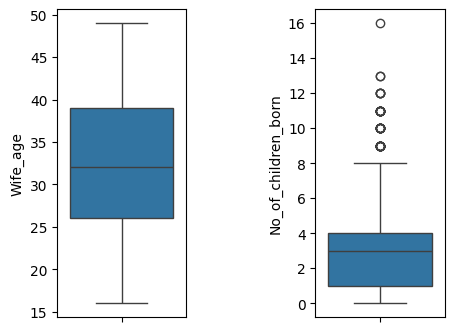

In [64]:
plt.figure(figsize=[5,4])
plt.subplot(1,2,1)
sns.boxplot(data=df, y='Wife_age');
plt.subplot(1,2,2)
sns.boxplot(data=df_copy, y='No_of_children_born');
plt.subplots_adjust(wspace=1, hspace=0.5);
# plt.tight_layout();

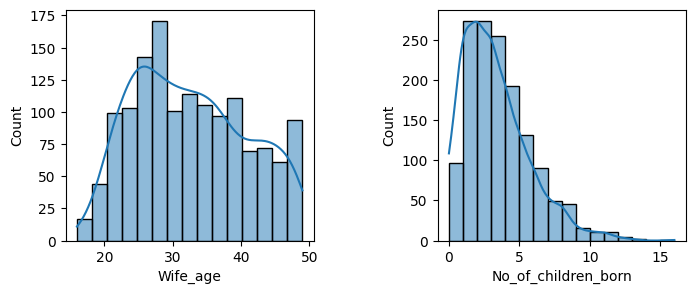

In [66]:
plt.figure(figsize=[8,3])
plt.subplot(1,2,1)
sns.histplot(data=df, x='Wife_age', kde=True);
plt.subplot(1,2,2)
sns.histplot(data=df, x='No_of_children_born', kde=True, binwidth=1);
plt.subplots_adjust(wspace=0.5, hspace=0.5);
# plt.tight_layout();

In [30]:
df.columns

Index(['Wife_age', 'Wife_ education', 'Husband_education',
       'No_of_children_born', 'Wife_religion', 'Wife_Working',
       'Husband_Occupation', 'Standard_of_living_index', 'Media_exposure ',
       'Contraceptive_method_used'],
      dtype='object')

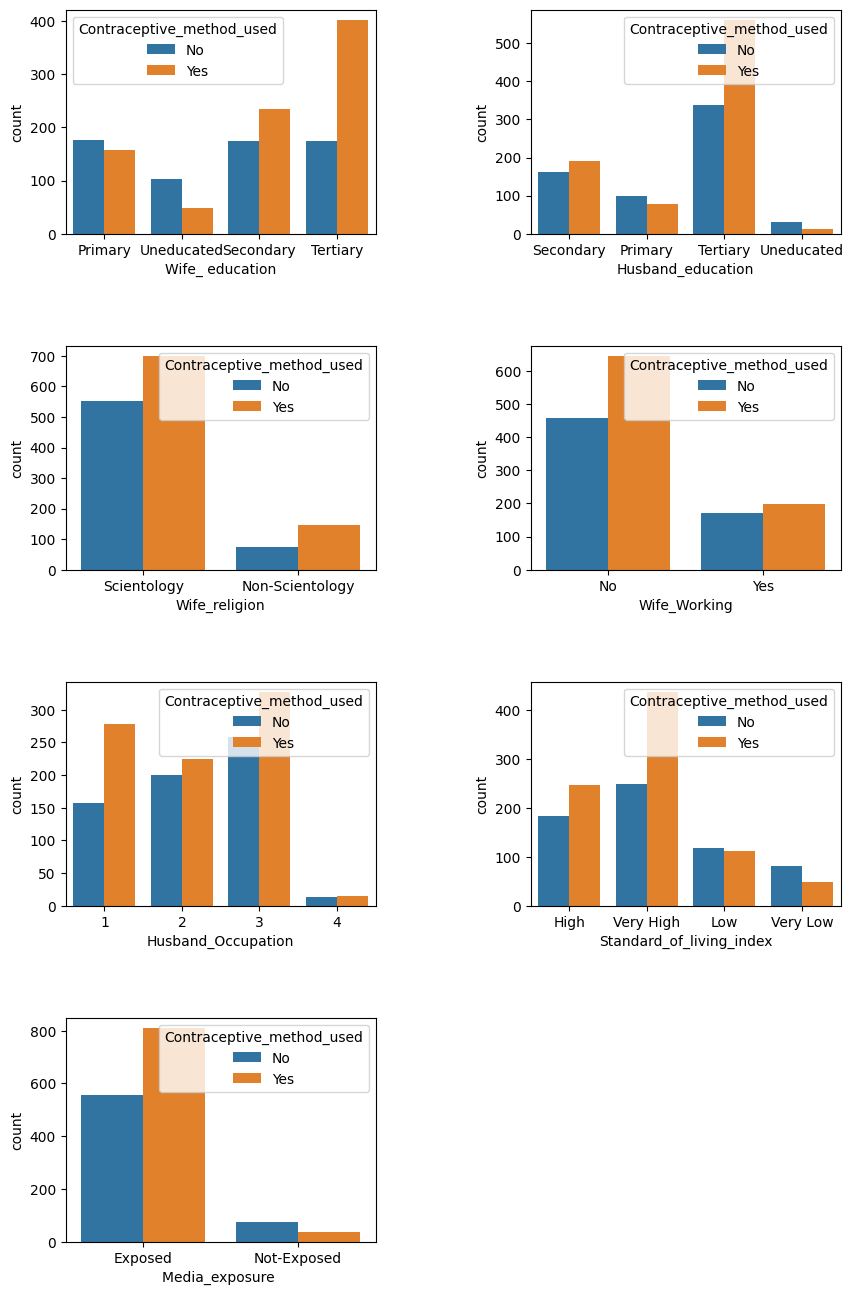

In [62]:
plt.figure(figsize=[10,16])
plt.subplot(4,2,1)
sns.countplot(data=df, x='Wife_ education', hue='Contraceptive_method_used');
plt.subplot(4,2,2)
sns.countplot(data=df, x='Husband_education', hue='Contraceptive_method_used');
plt.subplot(4,2,3)
sns.countplot(data=df, x='Wife_religion', hue='Contraceptive_method_used');
plt.subplot(4,2,4)
sns.countplot(data=df, x='Wife_Working', hue='Contraceptive_method_used');
plt.subplot(4,2,5)
sns.countplot(data=df, x='Husband_Occupation', hue='Contraceptive_method_used');
plt.subplot(4,2,6)
sns.countplot(data=df, x='Standard_of_living_index', hue='Contraceptive_method_used');
plt.subplot(4,2,7)
sns.countplot(data=df, x='Media_exposure ', hue='Contraceptive_method_used');
plt.subplots_adjust(wspace=0.5, hspace=0.5);
# plt.tight_layout();

### Outlier Treatment

In [38]:
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [41]:
LL, UL = remove_outlier(df['No_of_children_born'])
df['No_of_children_born'] = np.where(df['No_of_children_born'] > UL, UL, df['No_of_children_born'])
df['No_of_children_born'] = np.where(df['No_of_children_born'] < LL, LL, df['No_of_children_born'])

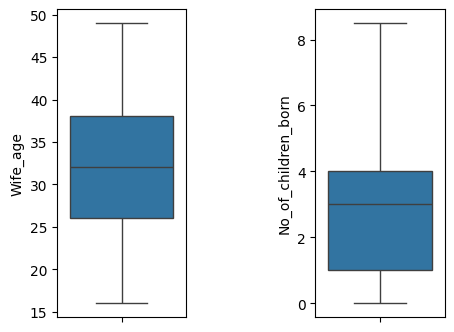

In [52]:
plt.figure(figsize=[5,4])
plt.subplot(1,2,1)
sns.boxplot(data=df, y='Wife_age');
plt.subplot(1,2,2)
sns.boxplot(data=df, y='No_of_children_born');
plt.subplots_adjust(wspace=1) 
# plt.tight_layout();

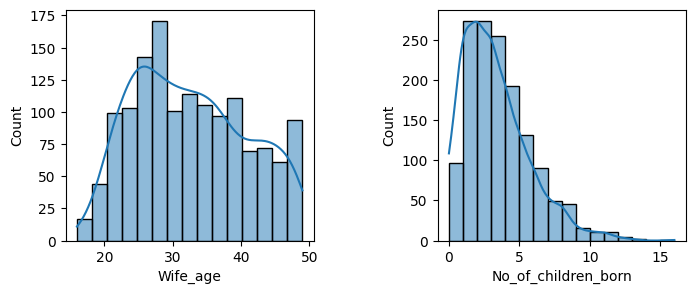

In [69]:
plt.figure(figsize=[8,3])
plt.subplot(1,2,1)
sns.histplot(data=df, x='Wife_age', kde=True);
plt.subplot(1,2,2)
sns.histplot(data=df, x='No_of_children_born', kde=True, binwidth=1);
plt.subplots_adjust(wspace=0.5, hspace=0.5);
# plt.tight_layout();

## Multivariate Analysis

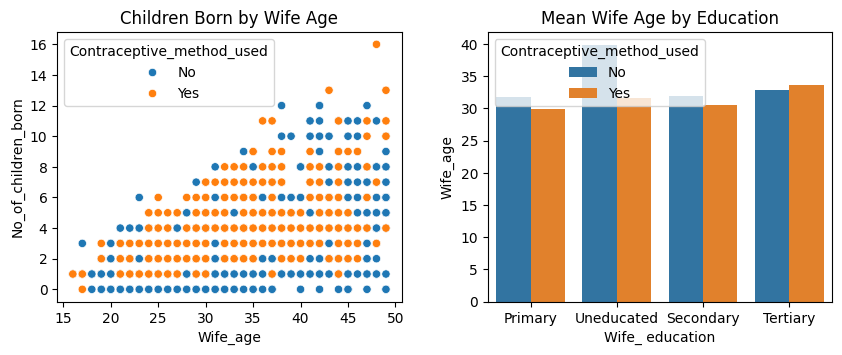

In [95]:
plt.figure(figsize=[10,3.5])
plt.subplot(1,2,1)
plt.title("Children Born by Wife Age")
sns.scatterplot(data=df, x='Wife_age', y='No_of_children_born', hue='Contraceptive_method_used');
plt.subplot(1,2,2)
plt.title("Mean Wife Age by Education")
sns.barplot(data=df, x='Wife_ education', y='Wife_age', hue='Contraceptive_method_used', errorbar=None);
plt.subplots_adjust(wspace=0.25, hspace=0.5);
# plt.tight_layout();

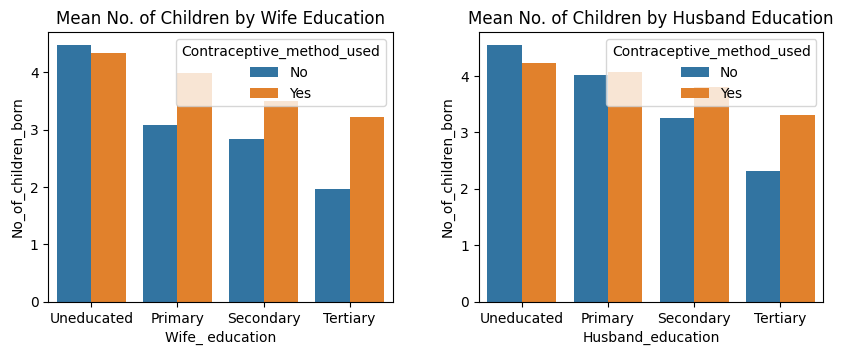

In [101]:
plt.figure(figsize=[10,3.5])
plt.subplot(1,2,1)
plt.title("Mean No. of Children by Wife Education")
sns.barplot(data=df, x='Wife_ education', y=df['No_of_children_born'], hue='Contraceptive_method_used', errorbar=None,\
            order=['Uneducated', 'Primary', 'Secondary', 'Tertiary']);
plt.subplot(1,2,2)
plt.title("Mean No. of Children by Husband Education")
sns.barplot(data=df, x=df['Husband_education'], y=df['No_of_children_born'], hue='Contraceptive_method_used', errorbar=None,\
            order=['Uneducated', 'Primary', 'Secondary', 'Tertiary']);
plt.subplots_adjust(wspace=0.25, hspace=0.5);

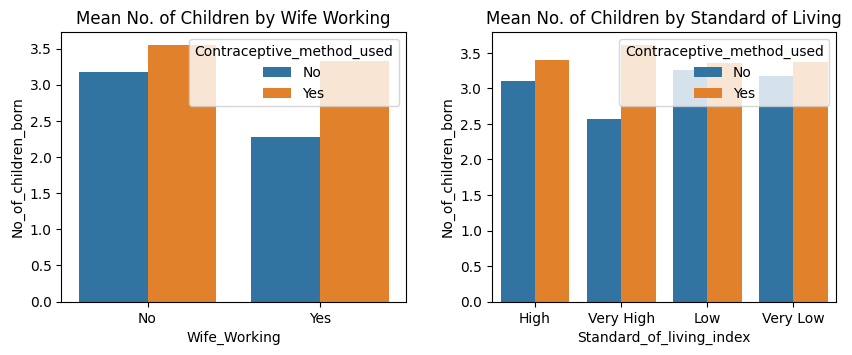

In [97]:
plt.figure(figsize=[10,3.5])
plt.subplot(1,2,1)
plt.title("Mean No. of Children by Wife Working")
sns.barplot(data=df, x=df['Wife_Working'], y=df['No_of_children_born'], hue='Contraceptive_method_used', errorbar=None);
plt.subplot(1,2,2)
plt.title("Mean No. of Children by Standard of Living")
sns.barplot(data=df, x=df['Standard_of_living_index'], y=df['No_of_children_born'], hue='Contraceptive_method_used', errorbar=None);
plt.subplots_adjust(wspace=0.25, hspace=0.5);

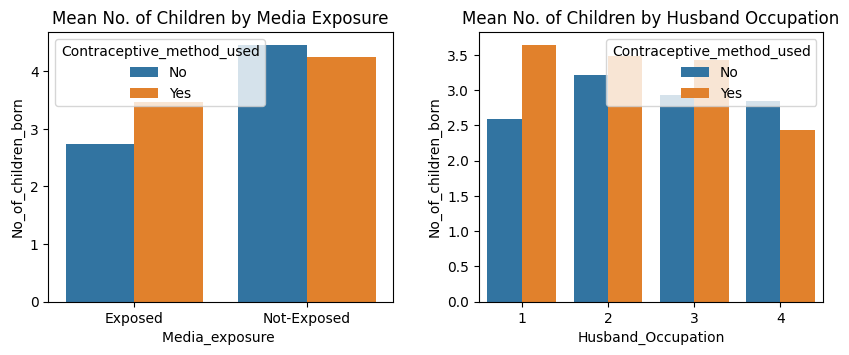

In [104]:
plt.figure(figsize=[10,3.5])
plt.subplot(1,2,1)
plt.title("Mean No. of Children by Media Exposure")
sns.barplot(data=df, x=df['Media_exposure '], y=df['No_of_children_born'], hue='Contraceptive_method_used', errorbar=None);
plt.subplot(1,2,2)
plt.title("Mean No. of Children by Husband Occupation")
sns.barplot(data=df, x=df['Husband_Occupation'], y=df['No_of_children_born'], hue='Contraceptive_method_used', errorbar=None);
plt.subplots_adjust(wspace=0.25, hspace=0.5);

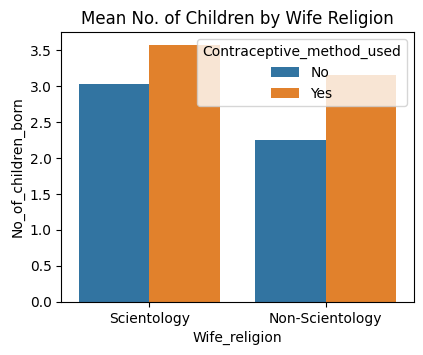

In [102]:
plt.figure(figsize=[10,3.5])
plt.subplot(1,2,1)
plt.title("Mean No. of Children by Wife Religion")
sns.barplot(data=df, x=df['Wife_religion'], y=df['No_of_children_born'], hue='Contraceptive_method_used', errorbar=None);

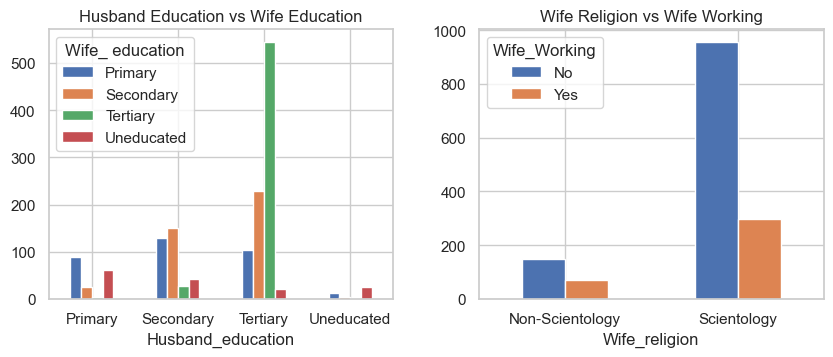

In [246]:
plt.figure(figsize=[10,3.5])
plt.subplot(1,2,1)
plt.title("Husband Education vs Wife Education")
pd.crosstab(df_copy['Husband_education'],df_copy['Wife_ education']).plot(kind='bar', ax=plt.gca());
plt.xticks(rotation=0)
plt.subplot(1,2,2)
plt.title("Wife Religion vs Wife Working")
pd.crosstab(df_copy['Wife_religion'],df_copy['Wife_Working']).plot(kind='bar', ax=plt.gca());
plt.xticks(rotation=0)
plt.subplots_adjust(wspace=0.25, hspace=0.5);
plt.show()

In [291]:
df_copy['Husband_Occupation'] = df_copy['Husband_Occupation'].astype('category')

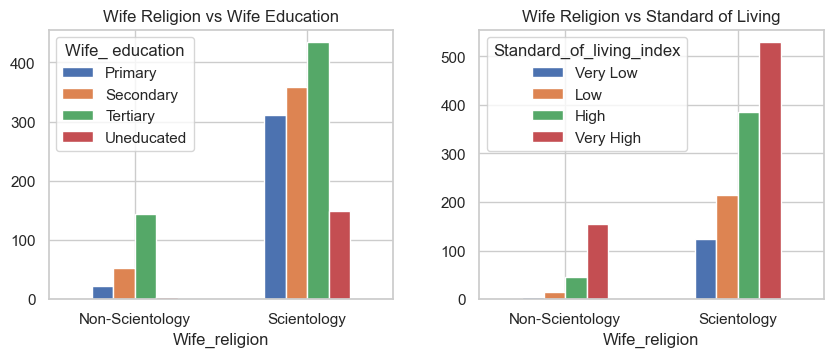

In [261]:
plt.figure(figsize=[10,3.5])
plt.subplot(1,2,1)
plt.title("Wife Religion vs Wife Education")
pd.crosstab(df_copy['Wife_religion'],df_copy['Wife_ education']).plot(kind='bar', ax=plt.gca());
plt.xticks(rotation=0)
plt.subplot(1,2,2)
plt.title("Wife Religion vs Standard of Living")
pd.crosstab(df_copy['Wife_religion'], df_copy['Standard_of_living_index']) \
        .reindex(columns=['Very Low','Low','High','Very High']) \
        .plot(kind='bar', ax=plt.gca());
plt.xticks(rotation=0)
plt.subplots_adjust(wspace=0.25, hspace=0.5);
plt.show()

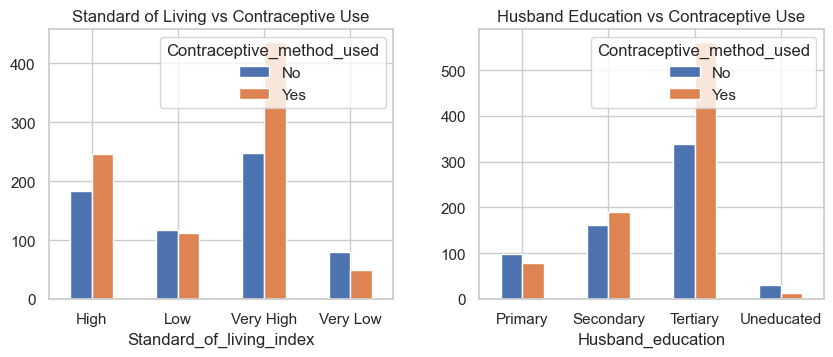

In [303]:
plt.figure(figsize=[10,3.5])
plt.subplot(1,2,1)
plt.title("Standard of Living vs Contraceptive Use")
pd.crosstab(df_copy['Standard_of_living_index'],df_copy['Contraceptive_method_used']).plot(kind='bar', ax=plt.gca());
plt.xticks(rotation=0)
plt.subplot(1,2,2)
plt.title("Husband Education vs Contraceptive Use")
pd.crosstab(df_copy['Husband_education'], df_copy['Contraceptive_method_used']).plot(kind='bar', ax=plt.gca());
plt.xticks(rotation=0)
plt.subplots_adjust(wspace=0.25, hspace=0.5);
plt.show()

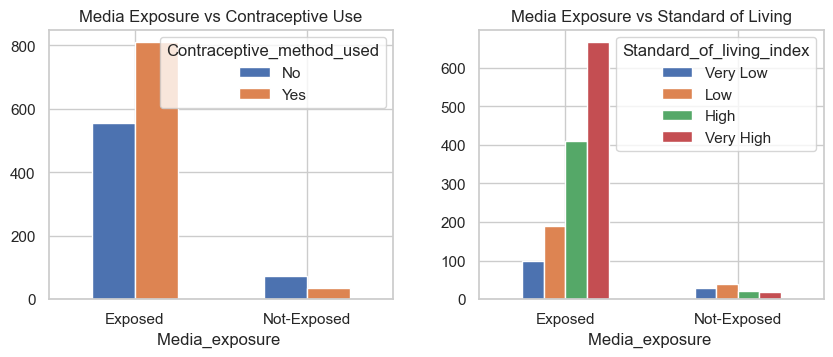

In [298]:
plt.figure(figsize=[10,3.5])
plt.subplot(1,2,1)
plt.title("Media Exposure vs Contraceptive Use")
pd.crosstab(df_copy['Media_exposure '], df_copy['Contraceptive_method_used']).plot(kind='bar', ax=plt.gca());
plt.xticks(rotation=0)
plt.subplot(1,2,2)
plt.title("Media Exposure vs Standard of Living")
pd.crosstab(df_copy['Media_exposure '], df_copy['Standard_of_living_index'])\
        .reindex(columns=['Very Low','Low','High','Very High']).plot(kind='bar', ax=plt.gca());
plt.xticks(rotation=0)
plt.subplots_adjust(wspace=0.25, hspace=0.5);
plt.show()

In [1]:
plt.figure(figsize=[10,3.5])
plt.subplot(1,2,1)
plt.title("Wife Working vs Contraceptive Use")
pd.crosstab(df_copy['Wife_Working'], df_copy['Contraceptive_method_used']).plot(kind='bar', ax=plt.gca());
plt.xticks(rotation=0)
plt.subplot(1,2,2)
plt.title("Wife Education vs Contraceptive Use")
pd.crosstab(df_copy['Wife_ education'], df_copy['Contraceptive_method_used']).plot(kind='bar', ax=plt.gca());
plt.xticks(rotation=0)
plt.subplots_adjust(wspace=0.25, hspace=0.5);
plt.show()

NameError: name 'plt' is not defined

In [117]:
df[['Wife_age', 'No_of_children_born']].corr()

,Wife_age,No_of_children_born
Wife_age,1.000000,0.526923
No_of_children_born,0.526923,1.000000


## Logistic Regression

### Converting to Numeric Values

In [126]:
df['Wife_ education'].unique()

array(['Primary', 'Uneducated', 'Secondary', 'Tertiary'], dtype=object)

In [127]:
df['Wife_ education'] = df['Wife_ education'].replace(['Uneducated':0, 'Primary':1, 'Secondary': 2, 'Tertiary': 3})

/var/folders/qr/rb2cndh91s11z756vfxgd8dc0000gn/T/ipykernel_56384/3082347479.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Wife_ education'] = df['Wife_ education'].replace({'Uneducated':0, 'Primary':1, 'Secondary': 2, 'Tertiary': 3})


In [128]:
df['Wife_ education'].unique()

array([1, 0, 2, 3])

In [129]:
df['Husband_education'] = df['Husband_education'].replace(['Uneducated', 'Primary', 'Secondary', 'Tertiary'],[0,1,2,3])

/var/folders/qr/rb2cndh91s11z756vfxgd8dc0000gn/T/ipykernel_56384/3363929631.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Husband_education'] = df['Husband_education'].replace(['Uneducated', 'Primary', 'Secondary', 'Tertiary'],[0,1,2,3])


In [130]:
df['Husband_education'].unique()

array([2, 1, 3, 0])

In [131]:
pd.set_option('future.no_silent_downcasting', True)

In [132]:
df['Wife_religion'].unique()

array(['Scientology', 'Non-Scientology'], dtype=object)

In [133]:
df['Wife_religion'] = df['Wife_religion'].replace({'Non-Scientology':0, 'Scientology':1})

In [134]:
df['Wife_religion'].unique()

array([1, 0], dtype=object)

In [135]:
df['Wife_Working'].unique()

array(['No', 'Yes'], dtype=object)

In [136]:
df['Wife_Working'] = df['Wife_Working'].replace({'No':0, 'Yes':1})

In [137]:
df['Wife_Working'].unique()

array([0, 1], dtype=object)

In [138]:
df['Standard_of_living_index'].unique()

array(['High', 'Very High', 'Low', 'Very Low'], dtype=object)

In [139]:
df['Standard_of_living_index'] = df['Standard_of_living_index'].replace({'Very Low':0, 'Low':1, 'High':2, 'Very High':3})

In [143]:
df['Standard_of_living_index'].unique()

array([2, 3, 1, 0], dtype=object)

In [144]:
df['Media_exposure '].unique()

array(['Exposed', 'Not-Exposed'], dtype=object)

In [145]:
df['Media_exposure '] = df['Media_exposure '].replace({'Not-Exposed':0, 'Exposed':1})

In [146]:
df['Media_exposure '].unique()

array([1, 0], dtype=object)

In [147]:
df['Contraceptive_method_used'] = df['Contraceptive_method_used'].replace({'No':0, 'Yes':1})

In [148]:
df['Contraceptive_method_used'].unique()

array([0, 1], dtype=object)

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Wife_age                   1473 non-null   float64 
 1   Wife_ education            1473 non-null   int64   
 2   Husband_education          1473 non-null   int64   
 3   No_of_children_born        1473 non-null   float64 
 4   Wife_religion              1473 non-null   object  
 5   Wife_Working               1473 non-null   object  
 6   Husband_Occupation         1473 non-null   category
 7   Standard_of_living_index   1473 non-null   object  
 8   Media_exposure             1473 non-null   object  
 9   Contraceptive_method_used  1473 non-null   object  
dtypes: category(1), float64(2), int64(2), object(5)
memory usage: 105.3+ KB


In [156]:
df['Wife_ education'] = df['Wife_ education'].astype('category')

In [157]:
df['Husband_education'] = df['Husband_education'].astype('category')

In [163]:
df['Contraceptive_method_used'] = df['Contraceptive_method_used'].astype('int')

### Getting Dummy Variables

In [164]:
df_dummy = pd.get_dummies(df, drop_first=True)
df_dummy.head()

,Wife_age,No_of_children_born,Contraceptive_method_used,Wife_ education_1,Wife_ education_2,Wife_ education_3,Husband_education_1,Husband_education_2,Husband_education_3,Wife_religion_1,Wife_Working_1,Husband_Occupation_2,Husband_Occupation_3,Husband_Occupation_4,Standard_of_living_index_1,Standard_of_living_index_2,Standard_of_living_index_3,Media_exposure _1
0,24.0,3.0,0,True,False,False,False,True,False,True,False,True,False,False,False,True,False,True
1,45.0,10.0,0,False,False,False,False,True,False,True,False,False,True,False,False,False,True,True
2,43.0,7.0,0,True,False,False,False,True,False,True,False,False,True,False,False,False,True,True
3,42.0,9.0,0,False,True,False,True,False,False,True,False,False,True,False,False,True,False,True
4,36.0,8.0,0,False,True,False,False,True,False,True,False,False,True,False,True,False,False,True


In [165]:
df_dummy.replace({True:1, False:0}, inplace=True)

In [169]:
df_dummy.head()

,Wife_age,No_of_children_born,Contraceptive_method_used,Wife_ education_1,Wife_ education_2,Wife_ education_3,Husband_education_1,Husband_education_2,Husband_education_3,Wife_religion_1,Wife_Working_1,Husband_Occupation_2,Husband_Occupation_3,Husband_Occupation_4,Standard_of_living_index_1,Standard_of_living_index_2,Standard_of_living_index_3,Media_exposure _1
0,24.0,3.0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,1
1,45.0,10.0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1
2,43.0,7.0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,1
3,42.0,9.0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,1
4,36.0,8.0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1


### Train Test Split

In [167]:
X = df_dummy.drop('Contraceptive_method_used', axis=1)
y = df_dummy['Contraceptive_method_used']

In [212]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=df_dummy['Contraceptive_method_used'])

In [172]:
y_train.value_counts(1)

Contraceptive_method_used
1    0.57323
0    0.42677
Name: proportion, dtype: float64

In [173]:
y_test.value_counts(1)

Contraceptive_method_used
1    0.572398
0    0.427602
Name: proportion, dtype: float64

### Logistic Regression Model

In [174]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,ConfusionMatrixDisplay

In [179]:
model = LogisticRegression(max_iter=1000)

In [180]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### Predicting on Training and Test Data

In [181]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [182]:
ytest_predict_prob=model.predict_proba(X_test)

In [183]:
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.212679,0.787321
1,0.859782,0.140218
2,0.968450,0.031550
3,0.354827,0.645173
4,0.266760,0.733240


### Accuracy Score

In [194]:
round(model.score(X_train, y_train),3)

0.693

In [193]:
round(model.score(X_test, y_test),3)

0.652

### AUC and ROC for Training Data

In [187]:
probs = model.predict_proba(X_train)

In [188]:
probs = probs[:, 1]

In [189]:
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)

AUC: 0.723


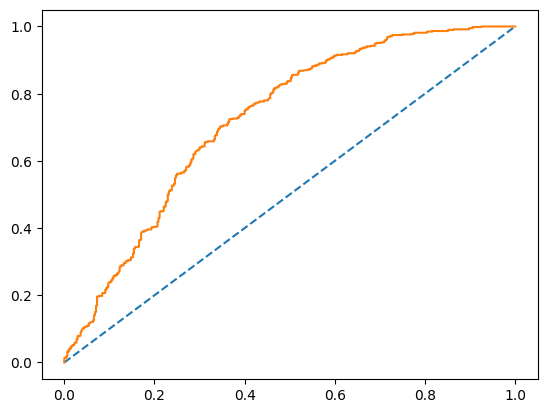

In [190]:
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

### AUC and ROC for Test Data

In [195]:
probs = model.predict_proba(X_test)

In [196]:
probs = probs[:, 1]

In [197]:
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)

AUC: 0.674


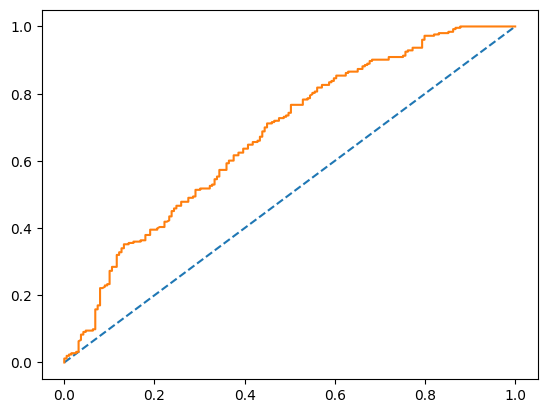

In [199]:
train_fpr, train_tpr, train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

### Confusion Matrix for Training Data

In [200]:
confusion_matrix(y_train, ytrain_predict)

array([[219, 221],
       [ 96, 495]])

In [201]:
cm = confusion_matrix(y_train, ytrain_predict)
cm

array([[219, 221],
       [ 96, 495]])

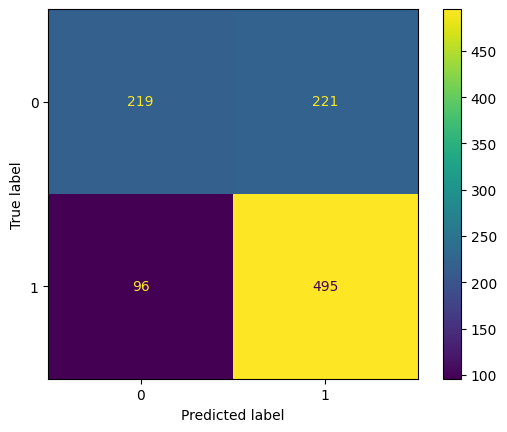

In [202]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot();

In [203]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.70      0.50      0.58       440
           1       0.69      0.84      0.76       591

    accuracy                           0.69      1031
   macro avg       0.69      0.67      0.67      1031
weighted avg       0.69      0.69      0.68      1031



### Confusion Matrix for Test Data

In [205]:
cm = confusion_matrix(y_test, ytest_predict)
cm

array([[ 84, 105],
       [ 49, 204]])

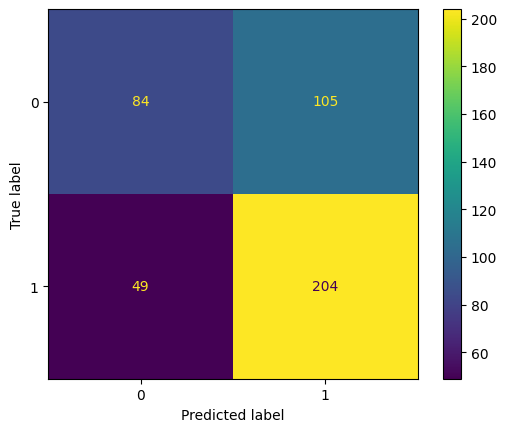

In [207]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot();

In [208]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.63      0.44      0.52       189
           1       0.66      0.81      0.73       253

    accuracy                           0.65       442
   macro avg       0.65      0.63      0.62       442
weighted avg       0.65      0.65      0.64       442



### Applying GridSearchCV

In [217]:
grid={'penalty':['l2', 'none'],
      'solver':['sag','lbfgs'],
      'tol':[0.0001,0.00001]}

In [218]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [219]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,scoring='f1')

In [220]:
grid_search.fit(X_train, y_train)

Fatal Python error: init_sys_streams: can't initialize sys standard streams
Python runtime state: core initialized
OSError: [Errno 9] Bad file descriptor

Current thread 0x000000010b75d600 (most recent call first):
  <no Python frame>
Fatal Python error: init_sys_streams: can't initialize sys standard streams
Python runtime state: core initialized
OSError: [Errno 9] Bad file descriptor

Current thread 0x00000001079d0600 (most recent call first):
  <no Python frame>
Fatal Python error: init_sys_streams: can't initialize sys standard streams
Python runtime state: core initialized
OSError: [Errno 9] Bad file descriptor

Current thread 0x000000010af2f600 (most recent call first):
  <no Python frame>
Fatal Python error: init_sys_streams: can't initialize sys standard streams
Python runtime state: core initialized
OSError: [Errno 9] Bad file descriptor

Current thread 0x0000000115b12600 (most recent call first):
  <no Python frame>
Fatal Python error: init_sys_streams: can't initialize sys s

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [221]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'sag', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2, solver='sag')


In [222]:
best_model = grid_search.best_estimator_

In [223]:
ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [224]:
ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.211925,0.788075
1,0.863684,0.136316
2,0.969375,0.030625
3,0.354436,0.645564
4,0.267129,0.732871


In [225]:
cm = confusion_matrix(y_train, ytrain_predict)
cm

array([[219, 221],
       [ 96, 495]])

              precision    recall  f1-score   support

           0       0.70      0.50      0.58       440
           1       0.69      0.84      0.76       591

    accuracy                           0.69      1031
   macro avg       0.69      0.67      0.67      1031
weighted avg       0.69      0.69      0.68      1031
 



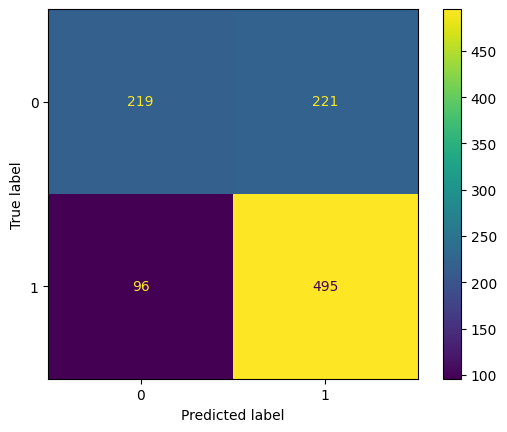

In [226]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.64      0.44      0.52       189
           1       0.66      0.81      0.73       253

    accuracy                           0.65       442
   macro avg       0.65      0.63      0.63       442
weighted avg       0.65      0.65      0.64       442
 



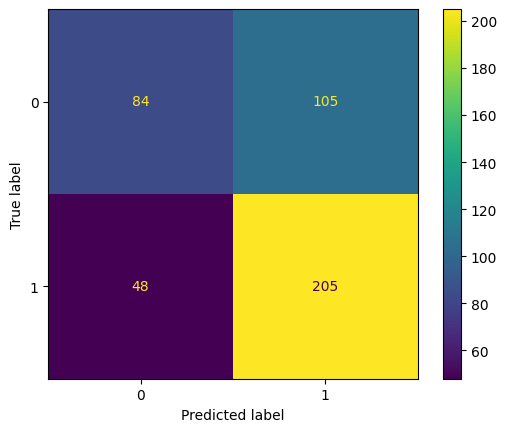

In [227]:
cm = confusion_matrix(y_test, ytest_predict)
cm
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()
print(classification_report(y_test, ytest_predict),'\n');

## Linear Discriminant Analysis

In [228]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

In [242]:
import matplotlib.pyplot as plt 
plt.rc("font", size=12)
plt.rcParams['axes.titlesize'] = 18
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [307]:
scaler=StandardScaler()
X = scaler.fit_transform(df.drop(['Contraceptive_method_used'],axis=1))
Y = df['Contraceptive_method_used']

In [308]:
Y.value_counts()

Contraceptive_method_used
1    844
0    629
Name: count, dtype: int64

In [309]:
clf = LinearDiscriminantAnalysis()
model=clf.fit(X,Y)
model

LinearDiscriminantAnalysis()

In [310]:
pred_class = model.predict(X)
df['Prediction'] = pred_class

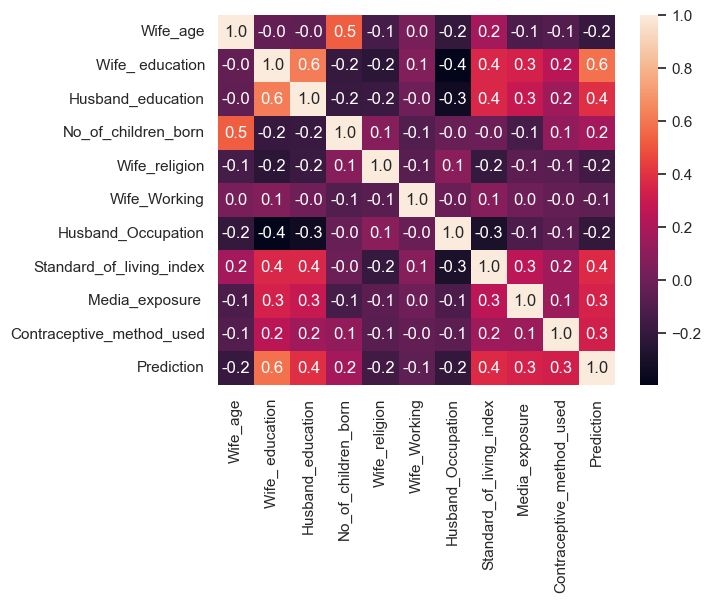

In [316]:
sns.heatmap(df.corr(), annot=True, fmt='.1f');

In [317]:
confusion_matrix(Y, pred_class)

array([[297, 332],
       [145, 699]])

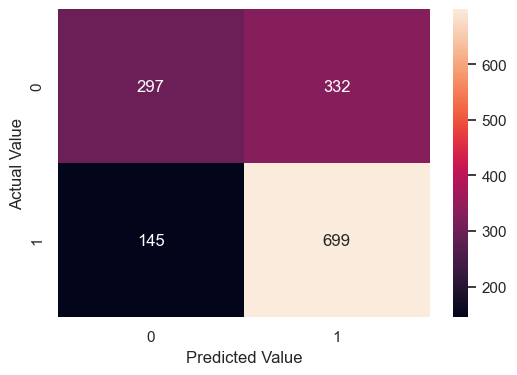

In [318]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(Y, pred_class),annot=True,fmt='.4g'),'\n\n'
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.show();

In [319]:
print(classification_report(Y, pred_class))

              precision    recall  f1-score   support

           0       0.67      0.47      0.55       629
           1       0.68      0.83      0.75       844

    accuracy                           0.68      1473
   macro avg       0.67      0.65      0.65      1473
weighted avg       0.68      0.68      0.66      1473



### Building the Equation

In [331]:
model.coef_.round(3)

array([[-0.608,  0.56 ,  0.005,  0.725, -0.13 , -0.062,  0.067,  0.256,
         0.114]])

In [323]:
model.intercept_.round(3)

array([0.344])

In [336]:
Equation = "LDF = " + str(model.intercept_[0].round(3)) + ' +'
print(Equation, end=" ")
for i in range(len(df.columns) - 2):
    # if i == 0:
        # print(model.coef_[0][i].round(3), "+", end=" ")
    if i != len(df.columns) - 3:
        print(model.coef_[0][i].round(3),"* (", df.columns[i],")","+",end="  ",)
    else:
        print(model.coef_[0][i].round(3), "* (", df.columns[i], ")")

LDF = 0.344 + -0.608 * ( Wife_age ) +  0.56 * ( Wife_ education ) +  0.005 * ( Husband_education ) +  0.725 * ( No_of_children_born ) +  -0.13 * ( Wife_religion ) +  -0.062 * ( Wife_Working ) +  0.067 * ( Husband_Occupation ) +  0.256 * ( Standard_of_living_index ) +  0.114 * ( Media_exposure  )


### Classification by Discriminant Score

In [351]:
DS=[]
coef=[-0.608,  0.56 ,  0.005,  0.725, -0.13 , -0.062,  0.067,  0.256, 0.114]  
for p in range(len(X)):
    s3=0
    for q in range(X.shape[1] - 2):
        s3 += (X[p,q]*coef[q]) 
    s3 += 0.344
    DS.append(s3)

In [352]:
s1=0
s2=0
for i in range(len(X)):
    if DS[i]>=0:
        print("FOR Row:",i," ")
        print()
        print("-->","{ DS: ",DS[i].round(3),">=0 , Classify as 1}")
        print("------------------------------------------------------------------------------------------")
        s1+=1
    elif DS[i]<0:
        print("FOR Row:",i," ")
        print()
        print("-->","{ DS: ",DS[i].round(3),"<0 , Classify as 0}")
        print("------------------------------------------------------------------------------------------")
        s2+=1

FOR Row: 0  

--> { DS:  0.352 >=0 , Classify as 1}
------------------------------------------------------------------------------------------
FOR Row: 1  

--> { DS:  0.457 >=0 , Classify as 1}
------------------------------------------------------------------------------------------
FOR Row: 2  

--> { DS:  0.233 >=0 , Classify as 1}
------------------------------------------------------------------------------------------
FOR Row: 3  

--> { DS:  1.472 >=0 , Classify as 1}
------------------------------------------------------------------------------------------
FOR Row: 4  

--> { DS:  1.621 >=0 , Classify as 1}
------------------------------------------------------------------------------------------
FOR Row: 5  

--> { DS:  0.989 >=0 , Classify as 1}
------------------------------------------------------------------------------------------
FOR Row: 6  

--> { DS:  0.301 >=0 , Classify as 1}
------------------------------------------------------------------------------------------

In [353]:
print(s1," rows classified as 1  ")
print(s2," rows classified as 0 ")

1055  rows classified as 1  
418  rows classified as 0 


### Classification by Probability

In [341]:
pred_prob=model.predict_proba(X)

In [344]:
pred_prob[:,1].round(3)

array([0.587, 0.672, 0.621, ..., 0.454, 0.455, 0.745])

In [354]:
s3,s4=0,0
for i in range(len(X)):
    if pred_prob[:,1][i]>=0.5:
        print("FOR Row:",i," ")
        print()
        print("-->","{ prob(Y=1|X) =",pred_prob[:,1][i].round(3),">=0.5 , Classify as 1 }")
        print("------------------------------------------------------------------------------------------")
        s3+=1
    elif pred_prob[:,1][i]<0.5:
        print("FOR Row:",i," ")
        print()
        print("-->","{ prob(Y=1|X) =",pred_prob[:,1][i].round(3),"< 0.5 , Classify as 0 }")
        print("------------------------------------------------------------------------------------------")
        s4+=1

FOR Row: 0  

--> { prob(Y=1|X) = 0.587 >=0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 1  

--> { prob(Y=1|X) = 0.672 >=0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 2  

--> { prob(Y=1|X) = 0.621 >=0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 3  

--> { prob(Y=1|X) = 0.813 >=0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 4  

--> { prob(Y=1|X) = 0.795 >=0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 5  

--> { prob(Y=1|X) = 0.728 >=0.5 , Classify as 1 }
------------------------------------------------------------------------------------------
FOR Row: 6  

--> { prob(Y=1|X) = 0.509 >=0.5 , Classify as 1 }
------

In [355]:
print(s3," rows classified as 1 ")
print(s4," rows classified as 0  ")

1031  rows classified as 1 
442  rows classified as 0  


## CART

In [356]:
from sklearn.tree import DecisionTreeClassifier

In [361]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Wife_age                   1473 non-null   float64 
 1   Wife_ education            1473 non-null   category
 2   Husband_education          1473 non-null   category
 3   No_of_children_born        1473 non-null   float64 
 4   Wife_religion              1473 non-null   object  
 5   Wife_Working               1473 non-null   object  
 6   Husband_Occupation         1473 non-null   category
 7   Standard_of_living_index   1473 non-null   object  
 8   Media_exposure             1473 non-null   object  
 9   Contraceptive_method_used  1473 non-null   int64   
 10  Prediction                 1473 non-null   int64   
dtypes: category(3), float64(2), int64(2), object(4)
memory usage: 97.1+ KB


### Converting to Numerical Format

In [368]:
df['Wife_ education'] = df['Wife_ education'].astype('int')

In [370]:
df['Husband_education'] = df['Husband_education'].astype('int')

In [371]:
df['Wife_religion'] = df['Wife_religion'].astype('int')

In [372]:
df['Wife_Working'] = df['Wife_Working'].astype('int')

In [373]:
df['Husband_Occupation'] = df['Husband_Occupation'].astype('int')

In [374]:
df['Standard_of_living_index'] = df['Standard_of_living_index'].astype('int')

In [375]:
df['Media_exposure '] = df['Media_exposure '].astype('int')

In [376]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1473 non-null   float64
 1   Wife_ education            1473 non-null   int64  
 2   Husband_education          1473 non-null   int64  
 3   No_of_children_born        1473 non-null   float64
 4   Wife_religion              1473 non-null   int64  
 5   Wife_Working               1473 non-null   int64  
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   int64  
 8   Media_exposure             1473 non-null   int64  
 9   Contraceptive_method_used  1473 non-null   int64  
 10  Prediction                 1473 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 126.7 KB


In [378]:
ld_df = df.drop('Prediction', axis=1)

### Train Test Split and Building a Decision Tree Classifier

In [379]:
X = ld_df.drop('Contraceptive_method_used', axis=1)
y = ld_df['Contraceptive_method_used']

In [380]:
X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [381]:
dt_model = DecisionTreeClassifier(criterion = 'gini', random_state=1)

In [382]:
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(random_state=1)

In [383]:
from sklearn import tree

In [385]:
train_char_label = ['No', 'Yes']
ld_Tree_File = open('ind_moh_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, 
                                out_file=ld_Tree_File, 
                                feature_names = list(X_train), 
                                class_names = list(train_char_label))

ld_Tree_File.close()

### Variable Importance

In [2]:
print (pd.DataFrame(dt_model.feature_importances_.round(3), columns = ["Imp"],\
                    index = X_train.columns).sort_values('Imp',ascending=False))

NameError: name 'pd' is not defined

### Predicting Test Data

In [387]:
y_predict = dt_model.predict(X_test)

### Regularising the Decision Tree

In [388]:
from sklearn.model_selection import GridSearchCV

In [389]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [1,5,10,15,20],
              'min_samples_leaf':[1,5,10,15,20],
              'criterion' :['gini', 'entropy']
             }

In [390]:
tree_clas = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, train_labels)

Fitting 5 folds for each of 450 candidates, totalling 2250 fits


/Users/Sardiwal_Anirudh/anaconda3/envs/notebook/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
750 fits failed out of a total of 2250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
750 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/Sardiwal_Anirudh/anaconda3/envs/notebook/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/Sardiwal_Anirudh/anaconda3/envs/notebook/lib/python3.11/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/Users/Sardiwal_Anirudh/anaconda3/envs/notebook/lib/python3.11/site-pack

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1024),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 5, 10, 15, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10, 15, 20]},
             verbose=True)

In [392]:
grid_search.best_params_

{'ccp_alpha': 0.001,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 20}

In [393]:
reg_dt_model = DecisionTreeClassifier( ccp_alpha=0.001,criterion='gini', max_depth=10,
                       max_features='sqrt',
                           random_state=1024, min_samples_leaf=20)

In [394]:
reg_dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=10, max_features='sqrt',
                       min_samples_leaf=20, random_state=1024)

### Generating New Tree

In [395]:
ld_tree_regularized = open('ind_moh_tree_reg','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= ld_tree_regularized , \
                                feature_names = list(X_train), class_names = list(train_char_label))

ld_tree_regularized.close()
dot_data

In [396]:
print (pd.DataFrame(reg_dt_model.feature_importances_, \
                    columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                               Imp
No_of_children_born       0.492656
Wife_age                  0.217457
Wife_ education           0.207260
Standard_of_living_index  0.027666
Media_exposure            0.026342
Husband_Occupation        0.014741
Wife_religion             0.007325
Husband_education         0.006552
Wife_Working              0.000000


### Predicting on Training and Test Data

In [397]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

In [399]:
ytest_predict_prob=reg_dt_model.predict_proba(X_test)

In [400]:
 pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.292683,0.707317
1,0.984615,0.015385
2,0.257812,0.742188
3,0.257812,0.742188
4,0.984615,0.015385


### AUC-ROC for Training Data

In [401]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

AUC: 0.771


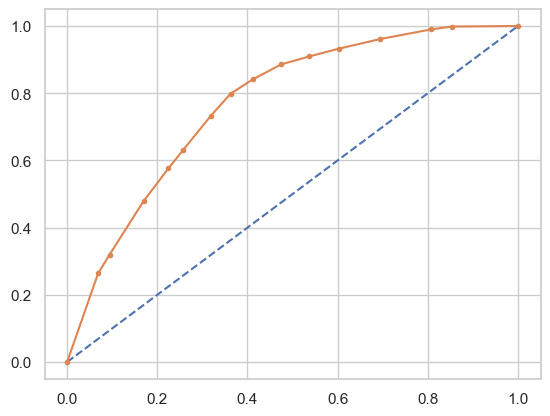

In [402]:
probs = reg_dt_model.predict_proba(X_train)
probs = probs[:, 1]

auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)

fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(fpr, tpr, marker='.')
plt.show()

### AUC-ROC for Test Data

AUC: 0.719


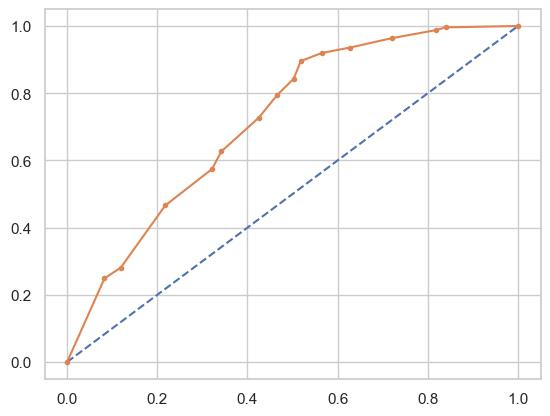

In [405]:
probs = reg_dt_model.predict_proba(X_test)
probs = probs[:, 1]

auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)

fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(fpr, tpr, marker='.')
plt.show()

### Confusion Matrix for Training Data

In [406]:
confusion_matrix(train_labels, ytrain_predict)

array([[256, 180],
       [ 94, 501]])

In [412]:
print("Accuracy Score :",round(reg_dt_model.score(X_train,train_labels),3))

Accuracy Score : 0.734


In [413]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.73      0.59      0.65       436
           1       0.74      0.84      0.79       595

    accuracy                           0.73      1031
   macro avg       0.73      0.71      0.72      1031
weighted avg       0.73      0.73      0.73      1031



### Confusion Matrix for Test Data

In [421]:
confusion_matrix(test_labels, ytest_predict)

array([[ 96,  97],
       [ 39, 210]])

In [422]:
confusion_matrix(test_labels, ytest_predict, normalize='true').round(2)

array([[0.5 , 0.5 ],
       [0.16, 0.84]])

In [415]:
print("Accuracy Score :",round(reg_dt_model.score(X_test,test_labels),3))

Accuracy Score : 0.692


In [416]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.71      0.50      0.59       193
           1       0.68      0.84      0.76       249

    accuracy                           0.69       442
   macro avg       0.70      0.67      0.67       442
weighted avg       0.70      0.69      0.68       442

